In [1]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')    


# EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
Number of unique in each column?
Number of people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate
Get data model ready

In [3]:

# Check number of rows and columns
data.shape



(5000, 14)

In [4]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [5]:
print('*******************No of people with zero mortgage************************')

data[data['Mortgage']==0].count()



*******************No of people with zero mortgage************************


ID                    3462
Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [6]:
print('*******************No of people with zero credit card spending************************')

data[data['CCAvg']==0].count()

*******************No of people with zero credit card spending************************


ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [7]:
print('*******************Education value counts************************')
print(data['Education'].value_counts())
print('*******************Personal loan value counts************************')
print(data['Personal Loan'].value_counts())
print('*******************Securities Account value counts************************')
print(data['Securities Account'].value_counts())
print('*******************CD Account value counts************************')
print(data['CD Account'].value_counts())
print('*******************Online value counts************************')
print(data['Online'].value_counts())
print('*******************CreditCard value counts************************')
print(data['CreditCard'].value_counts())


*******************Education value counts************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
*******************Personal loan value counts************************
0    4520
1     480
Name: Personal Loan, dtype: int64
*******************Securities Account value counts************************
0    4478
1     522
Name: Securities Account, dtype: int64
*******************CD Account value counts************************
0    4698
1     302
Name: CD Account, dtype: int64
*******************Online value counts************************
1    2984
0    2016
Name: Online, dtype: int64
*******************CreditCard value counts************************
0    3530
1    1470
Name: CreditCard, dtype: int64


# Univariate and Bi variate analysis


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
data = data.drop('ID', axis =1 ) # dropping ID column


    ##Univariate analysis of diff parameters with count plot

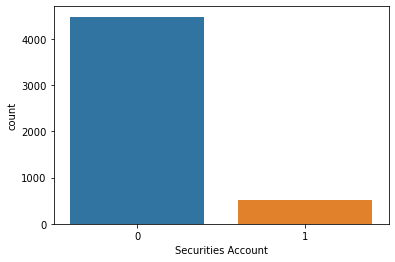

In [11]:
    sns.countplot(data['Securities Account'])
    plt.show()

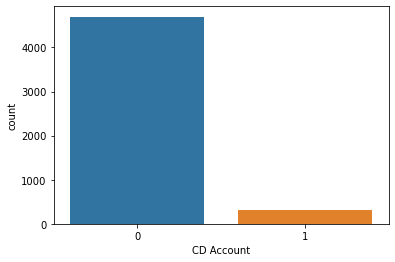

In [12]:
    sns.countplot(data['CD Account'])
    plt.show()

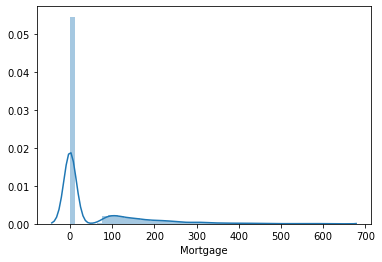

In [13]:
sns.distplot(data['Mortgage'])
plt.show()

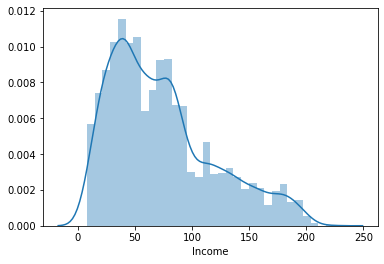

In [14]:
sns.distplot(data['Income'])
plt.show()

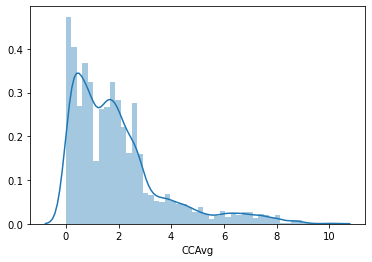

In [15]:
sns.distplot(data['CCAvg'])
plt.show()

Bivariate Analysis with the dependent variable and also heat map to identify relationships among independent variables

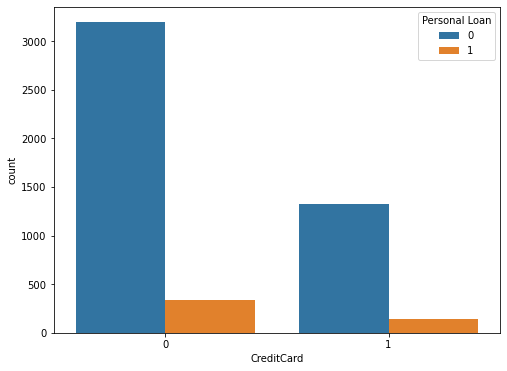

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'CreditCard',data=data,hue='Personal Loan')
plt.show()

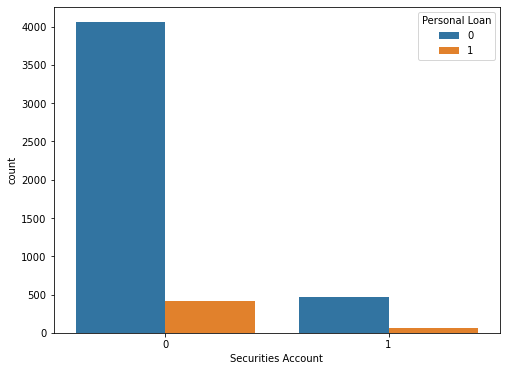

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Securities Account',data=data,hue='Personal Loan')
plt.show()

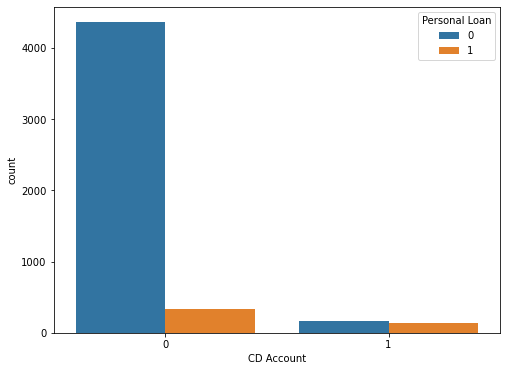

In [18]:

plt.figure(figsize=(8,6))
sns.countplot(x = 'CD Account',data=data,hue='Personal Loan')
plt.show()

In [19]:
# Binning
bin_edges = [-1,1,50,100,150,200,250,300,350,400,20000]       
bin_labels = ['0', '1-50','50-100','100-150','150-200','200-250',
              '250-300','300-350', '350-400', '400-20000']               
data['Mortgage'] = pd.cut(data['Mortgage'], bins=bin_edges , labels=bin_labels)

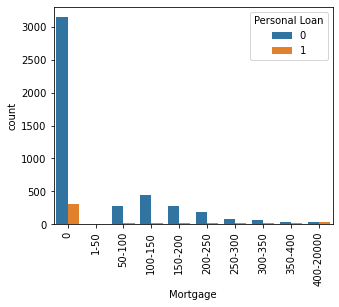

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Mortgage',data=data,hue='Personal Loan')
plt.xticks(rotation=90) 
plt.show()

In [21]:
data['Mortgage'] = data['Mortgage'].cat.codes
data['Mortgage'].unique()

array([0, 4, 3, 6, 2, 9, 5, 7, 8], dtype=int8)

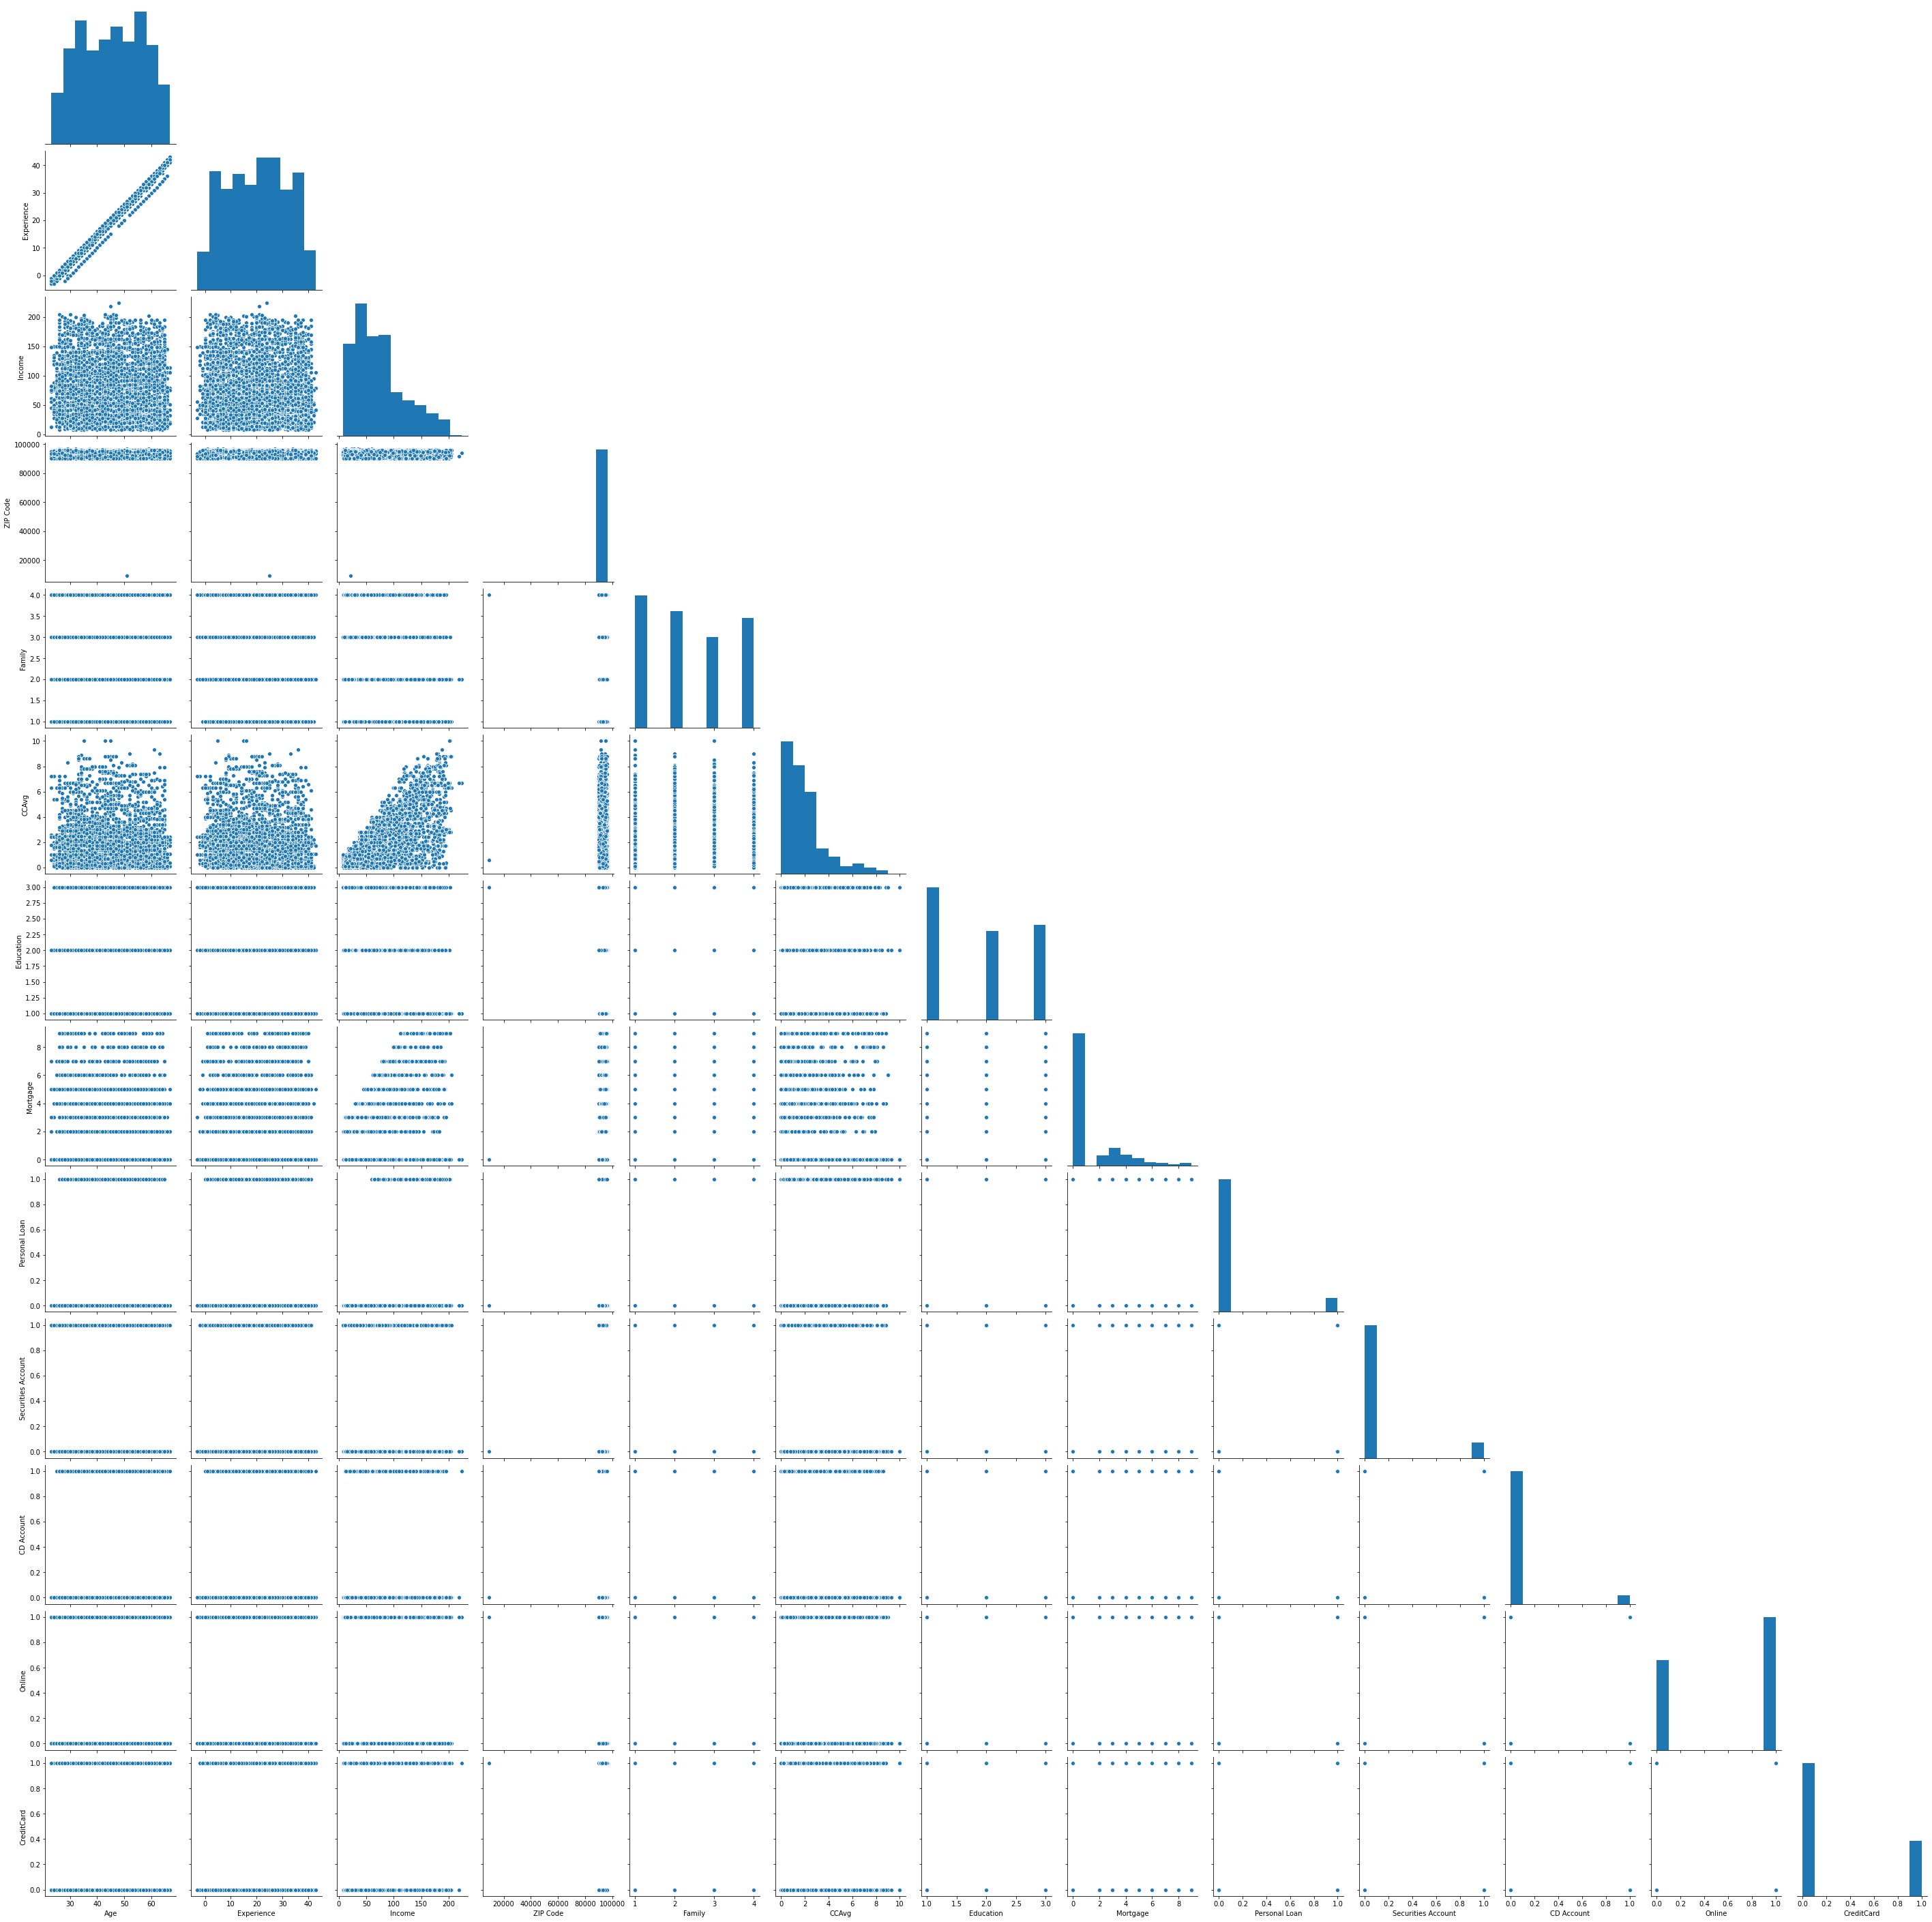

In [22]:
sns.pairplot(data, height=3, diag_kind='auto', corner=True)
plt.show()

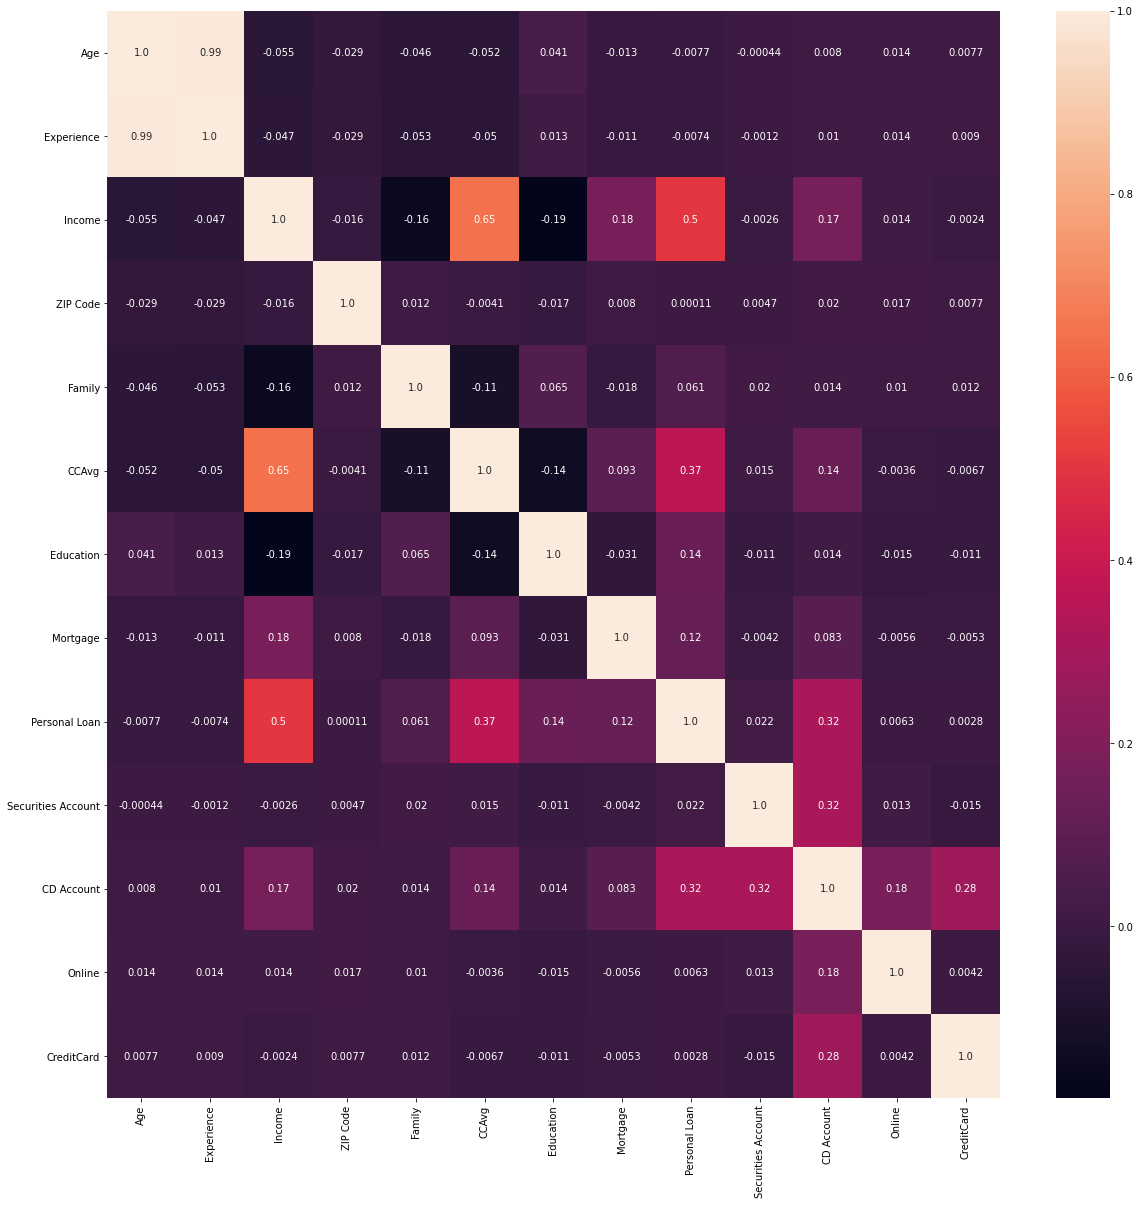

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

# <a id='link3'>Data Preparation</a>

In [24]:
# creating a data set with only relevant columns , dropping the dependent variable Personal loan 
# dropping  Zipcode from the data set as not relevant for the model 
datamod = data[['Age', 'Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
# converting categorical variables 
datamod1=datamod.astype({'Mortgage': 'category','Securities Account': 'category','CD Account': 'category','Online': 'category','CreditCard': 'category','Education': 'category'})
datamod1.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage              category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [25]:
# Independent variable extraction 
X = datamod1
X = pd.get_dummies(X, drop_first=True)
# dependent variable extraction and classification as category variable
y = data[['Personal Loan']].astype('category')     

print(X.head())
print(y.head())

   Age  Experience  Income  Family  CCAvg  Education_2  Education_3  \
0   25           1      49       4    1.6            0            0   
1   45          19      34       3    1.5            0            0   
2   39          15      11       1    1.0            0            0   
3   35           9     100       1    2.7            1            0   
4   35           8      45       4    1.0            1            0   

   Mortgage_2  Mortgage_3  Mortgage_4  Mortgage_5  Mortgage_6  Mortgage_7  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Mortgage_8  Mortgage_9  Securities Account_1  CD Account_1  Online_1  \
0           0           0          

In [26]:
print(X.shape)
print(y.shape)

(5000, 19)
(5000, 1)


In [27]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

In [28]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=43)
logreg.fit(X_train, y_train)                    # fit the model on train data




LogisticRegression(random_state=43)

In [29]:
y_predict = logreg.predict(X_test) 

In [30]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.tail()

,Age,Experience,Income,Family,CCAvg,Education_2,Education_3,Mortgage_2,Mortgage_3,Mortgage_4,...,Mortgage_6,Mortgage_7,Mortgage_8,Mortgage_9,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
460,60,36,141,2,2.1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2492,28,3,134,2,3.1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3028,63,39,38,3,0.1,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3437,57,31,39,4,0.7,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4579,58,32,41,1,0.2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.958

Testing accuracy 0.9566666666666667

Confusion Matrix


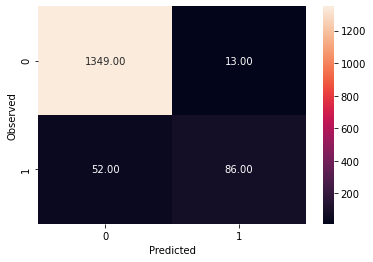

None

Recall: 0.6231884057971014

Precision: 0.8686868686868687

F1 Score: 0.7257383966244726

Roc Auc Score: 0.8068218093596374


In [32]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

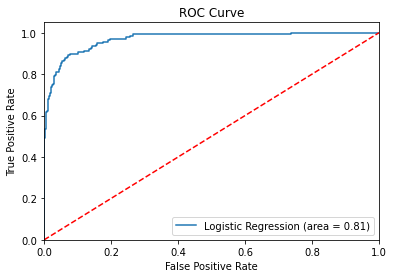

In [33]:
#!pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
6,Education_3,3.49
5,Education_2,3.38
16,CD Account_1,2.54
18,CreditCard_1,0.79
17,Online_1,0.61
3,Family,0.61
1,Experience,0.45
0,Age,0.45
12,Mortgage_7,0.38
13,Mortgage_8,0.37


## Different Parameter of Logistic regression and whether model performance is affected or not 

The model performance is mainly affected by Education level , particularly if it is graduate or Advanced professional . Also the parameters affecting if they accept the personal loan includes if Customer has a CD account , Credit card or online account
The other parameters impacting are the family size , experience level and age of customer 
Also higher the mortgage balance , the bigger impact on the model 




##### `Important Features`

    "Education", "CD Account", "Credit Card", "Online", "Family","Experience", "Age","Mortgage



##### `Business Understanding of the model 

Here the bank wants to understand which customers accept the personal loan of a bank so that future campaigns can be targeted at specific customer and the marketing budget can be well spent . The goal is to maximise the conversion of current liability customers to personal loan customers . 
The goal will be to minimise false negatives and increase true positives so that the marketing campaign can be very targeted and can increase the bang for the buck
The bank will receive maximum investment return if it focusses on customers with higher education , CD account , CC , online with more family numbers and higher on experience / age bracket . The model would be used to determine the customers to go after 
For this business case we are looking at a model with better precision and recall is not a important metric as downside is minimal for predicting someone would go for a loan and targetting them .The bank objective is not to miss out on targeting a customer who would have taken the loan and hence precision is the best metri